In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functions import event_probability 

In [3]:
# Load csv 
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Create new column (Survived) in raw test data with a value of 0 on each row
df_test['Survived'] = 0

In [4]:
# Show the given row and columns in the datasets
shape_train = df_train.shape
shape_test = df_test.shape
print('Train dataset shape: ')
print(shape_train)
print('Test dataset shape: ')
print(shape_test)

Train dataset shape: 
(891, 12)
Test dataset shape: 
(418, 12)


In [5]:
# Show all info of the datasets
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [6]:
display(df_train)
# display(df_test)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
# Show total of people onboard
total = df_train['PassengerId'].count() # 891

In [8]:
# Show total number of male and female onboard of the ship
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
# Show null values per column
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
sex = df_train.groupby('Sex')

male_pass = sex.get_group('male')
female_pass = sex.get_group('female')

In [11]:
# Gives the age thats most common amongst men onboard
male_pass.Age.mode()


0    19.0
1    25.0
2    28.0
Name: Age, dtype: float64

In [12]:
# Fill NaN values in the Age column
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)

In [13]:
# Create bins to fit an age range to every passenger
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]

# Cut age into age groups so you can view it better
df_train['Agerange'] = pd.cut(df_train.Age, bins,include_lowest = True)
df_test['Agerange'] = pd.cut(df_test.Age, bins,include_lowest = True)


In [14]:
# Check most common age range among male passengers that survived in the first class
male_surv_first_class = df_train[(df_train.Sex == 'male') & (df_train.Pclass == 1) & (df_train.Survived == 1)]
print(male_surv_first_class.Agerange.mode())
# display(male_surv_first_class)

# Check most common age range among female passengers that survived in the first class
female_surv_first_class = df_train[(df_train.Sex == 'female') & (df_train.Pclass == 1) & (df_train.Survived == 1)]
print(female_surv_first_class.Agerange.mode())
# display(male_surv_first_class)

0    (25.0, 30.0]
Name: Agerange, dtype: category
Categories (16, interval[float64, right]): [(-0.001, 5.0] < (5.0, 10.0] < (10.0, 15.0] < (15.0, 20.0] ... (60.0, 65.0] < (65.0, 70.0] < (70.0, 75.0] < (75.0, 80.0]]
0    (25.0, 30.0]
Name: Agerange, dtype: category
Categories (16, interval[float64, right]): [(-0.001, 5.0] < (5.0, 10.0] < (10.0, 15.0] < (15.0, 20.0] ... (60.0, 65.0] < (65.0, 70.0] < (70.0, 75.0] < (75.0, 80.0]]


In [15]:
# Check most common age range among male passengers that survived in the second class
male_surv_second_class = df_train[(df_train.Sex == 'male') & (df_train.Pclass == 2) & (df_train.Survived == 1)]
print(male_surv_second_class.Agerange.mode())
# display(male_surv_second_class)

# Check most common age range among female passengers that survived in the second class
female_surv_second_class = df_train[(df_train.Sex == 'female') & (df_train.Pclass == 2) & (df_train.Survived == 1)]
print(female_surv_second_class.Agerange.mode())
# display(male_surv_second_class)

0    (-0.001, 5.0]
Name: Agerange, dtype: category
Categories (16, interval[float64, right]): [(-0.001, 5.0] < (5.0, 10.0] < (10.0, 15.0] < (15.0, 20.0] ... (60.0, 65.0] < (65.0, 70.0] < (70.0, 75.0] < (75.0, 80.0]]
0    (25.0, 30.0]
Name: Agerange, dtype: category
Categories (16, interval[float64, right]): [(-0.001, 5.0] < (5.0, 10.0] < (10.0, 15.0] < (15.0, 20.0] ... (60.0, 65.0] < (65.0, 70.0] < (70.0, 75.0] < (75.0, 80.0]]


In [16]:
# Check most common age range among male passengers that survived in the third class
male_surv_third_class = df_train[(df_train.Sex == 'male') & (df_train.Pclass == 3) & (df_train.Survived == 1)]
print(male_surv_third_class.Agerange.mode())
# display(male_surv_third_class)

# Check most common age range among female passengers that survived in the third class
female_surv_third_class = df_train[(df_train.Sex == 'female') & (df_train.Pclass == 3) & (df_train.Survived == 1)]
print(female_surv_third_class.Agerange.mode())
display(female_surv_third_class)

0    (25.0, 30.0]
Name: Agerange, dtype: category
Categories (16, interval[float64, right]): [(-0.001, 5.0] < (5.0, 10.0] < (10.0, 15.0] < (15.0, 20.0] ... (60.0, 65.0] < (65.0, 70.0] < (70.0, 75.0] < (75.0, 80.0]]
0    (25.0, 30.0]
Name: Agerange, dtype: category
Categories (16, interval[float64, right]): [(-0.001, 5.0] < (5.0, 10.0] < (10.0, 15.0] < (15.0, 20.0] ... (60.0, 65.0] < (65.0, 70.0] < (70.0, 75.0] < (75.0, 80.0]]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agerange
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,"(25.0, 30.0]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,"(25.0, 30.0]"
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.000000,1,1,PP 9549,16.7000,G6,S,"(-0.001, 5.0]"
19,20,1,3,"Masselmani, Mrs. Fatima",female,29.699118,0,0,2649,7.2250,NaN,C,"(25.0, 30.0]"
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.000000,0,0,330923,8.0292,NaN,Q,"(10.0, 15.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,824,1,3,"Moor, Mrs. (Beila)",female,27.000000,0,1,392096,12.4750,E121,S,"(25.0, 30.0]"
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.000000,1,0,2659,14.4542,NaN,C,"(10.0, 15.0]"
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.000000,0,1,392091,9.3500,NaN,S,"(15.0, 20.0]"
858,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.000000,0,3,2666,19.2583,NaN,C,"(20.0, 25.0]"


In [17]:
# Shows how many male passengers did not survive
not_surv_male_pass = male_pass[(male_pass['Survived'] == 0)]
count_not_surv_male_pass = not_surv_male_pass.PassengerId.count() # 468


In [18]:
# Shows how many male passengers did survive
surv_male_pass = male_pass[(male_pass['Survived'] == 1)]
count_surv_male_pass = surv_male_pass.PassengerId.count() # 109

In [19]:
# Group male passengers by survived or not to plot the results
male_pass_graph = male_pass.groupby('Survived').Survived.count()


In [20]:
# Gives the age thats most common amongst women onboard
female_pass.Age.mean()

27.915708812260537

In [21]:
# Shows how many female passengers did not survive
not_surv_female_pass = female_pass[(female_pass['Survived'] == 0)]
count_not_surv_female_pass = not_surv_female_pass.PassengerId.count() # 81

In [22]:
# Shows how many female passengers did survive
surv_female_pass = female_pass[(female_pass['Survived'] == 1)]
count_surv_female_pass = surv_female_pass.PassengerId.count() # 233


In [23]:
# Group female passengers by survived or not to plot the results
female_pass_graph = female_pass.groupby('Survived').Survived.count()

In [24]:
# Total of people who survived
total_surv = df_train[(df_train['Survived'] == 1)]
total_not_surv = df_train[(df_train['Survived'] == 0)]

In [25]:
# Group survivers by sex
groupby_sex_surv = total_surv.groupby('Sex').Survived.count()
groupby_sex_not_surv = total_not_surv.groupby('Sex').Survived.count()

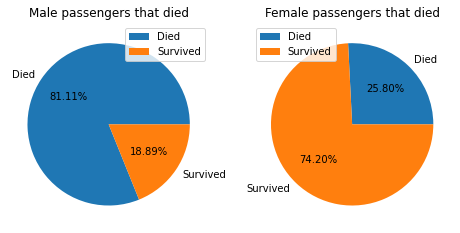

In [26]:
# Graphing surviving and non surviving females
fig, ax = plt.subplots(1, 2, figsize=(8,8))

ax[0].pie(male_pass_graph.values, labels=['Died', 'Survived'], autopct='%.2f%%')
ax[0].set_title('Male passengers that died')
ax[1].pie(female_pass_graph.values, labels=['Died', 'Survived'], autopct='%.2f%%')
ax[1].set_title('Female passengers that died')
ax[0].legend()
ax[1].legend()
plt.show()

In [27]:
# Probability for surviving as a female
prob_surv_female = event_probability(count_surv_female_pass, total)
print('Probability for surviving as a female: ' + str(prob_surv_female) + '%')

# Probability for not surviving as a female
prob_not_surv_female = event_probability(count_not_surv_female_pass, total)
print('Probability for not surviving as a female: ' + str(prob_not_surv_female) + '%')


Probability for surviving as a female: 26.15%
Probability for not surviving as a female: 9.09%


In [28]:
# Probability for surviving as a male
prob_surv_male = event_probability(count_surv_male_pass, total)
print('Probability for surviving as a male: ' + str(prob_surv_male) + '%')

# Probability for not surviving as male
prob_not_surv_male = event_probability(count_not_surv_male_pass, total)
print('Probability for not surviving as male: ' + str(prob_not_surv_male) + '%')

Probability for surviving as a male: 12.23%
Probability for not surviving as male: 52.53%


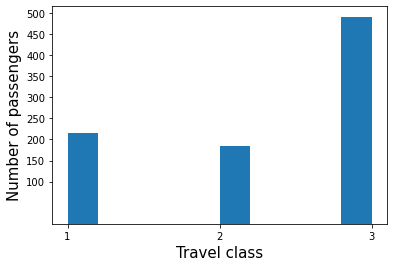

In [29]:
plt.figure(figsize=(6,4))
plt.hist(df_train.Pclass)
plt.xticks(range(1,4,1))
plt.yticks(range(100,550,50))
plt.xlabel('Travel class', fontsize=15)
plt.ylabel('Number of passengers', fontsize=15)
plt.show()

In [30]:
# Group passengers by class
classes = df_train.groupby('Pclass')

# Get every class seperate from eachother to plot 
first = classes.get_group(1)
second = classes.get_group(2)
third = classes.get_group(3)

C:\Users\yorri\AppData\Local\Temp\ipykernel_26988\1766721462.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(xlabels)
C:\Users\yorri\AppData\Local\Temp\ipykernel_26988\1766721462.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(xlabels)
C:\Users\yorri\AppData\Local\Temp\ipykernel_26988\1766721462.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(xlabels)


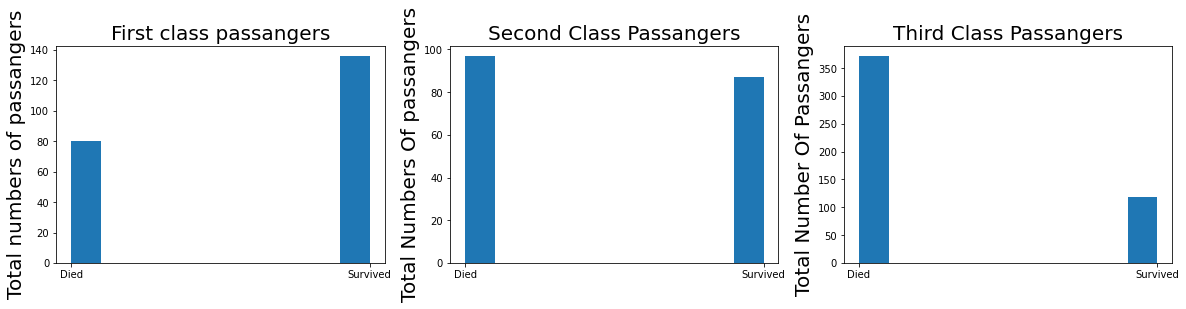

In [31]:
# Plot survived per class
fig, ax = plt.subplots(1,3, figsize=(20,4))
xlabels = ['Died', 'Survived']

ax[0].hist(first.Survived)
ax[0].set_title("First class passangers",fontsize = 20)
ax[0].set_ylabel("Total numbers of passangers",fontsize = 20)
ax[0].set_xticklabels(xlabels)
ax[0].set_xticks(range(0,2,1))

ax[1].hist(second.Survived)
ax[1].set_title("Second Class Passangers",fontsize = 20)
ax[1].set_ylabel("Total Numbers Of passangers",fontsize = 20)
ax[1].set_xticklabels(xlabels)
ax[1].set_xticks(range(0,2,1))

ax[2].hist(third.Survived)
ax[2].set_title("Third Class Passangers",fontsize = 20)
ax[2].set_ylabel("Total Number Of Passangers",fontsize = 20)
ax[2].set_xticklabels(xlabels)
ax[2].set_xticks(range(0,2,1))

plt.show()

In [32]:
# Group female passengers by class. This way we can plot them into histograms to see survival rate
female_pass_class = female_pass.groupby('Pclass')

female_first = female_pass_class.get_group(1)
female_second = female_pass_class.get_group(2)
female_third = female_pass_class.get_group(3)

# Group male passengers by class. This way we can plot them into histograms to see survival rate
male_pass_class = male_pass.groupby('Pclass')

male_first = male_pass_class.get_group(1)
male_second = male_pass_class.get_group(2)
male_third = male_pass_class.get_group(3)

C:\Users\yorri\AppData\Local\Temp\ipykernel_26988\668255093.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(xlabels)
C:\Users\yorri\AppData\Local\Temp\ipykernel_26988\668255093.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(xlabels)
C:\Users\yorri\AppData\Local\Temp\ipykernel_26988\668255093.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(xlabels)


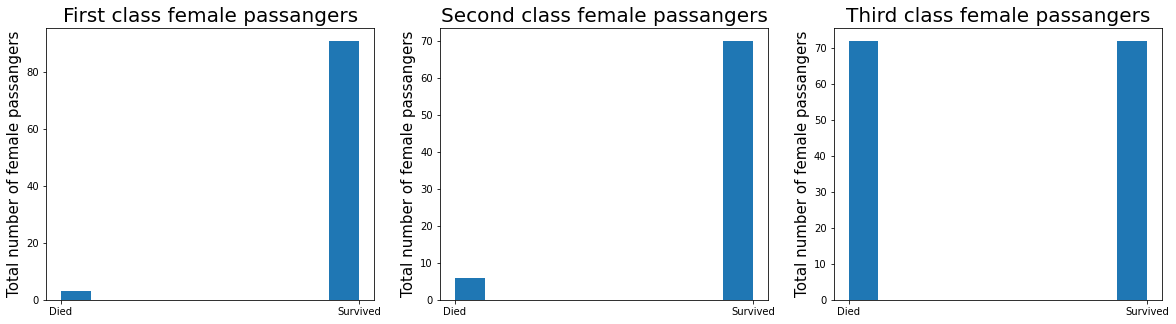

In [33]:
# Histogram of female passengers per class, this way we can conclude that most female passengers survived in the first and second class
fig, ax = plt.subplots(1,3, figsize=(20,5))

ax[0].hist(female_first.Survived)
ax[0].set_title("First class female passangers",fontsize = 20)
ax[0].set_ylabel("Total number of female passangers",fontsize = 15)
ax[0].set_xticklabels(xlabels)
ax[0].set_xticks(range(0,2,1))

ax[1].hist(female_second.Survived)
ax[1].set_title("Second class female passangers",fontsize = 20)
ax[1].set_ylabel("Total number of female passangers",fontsize = 15)
ax[1].set_xticklabels(xlabels)
ax[1].set_xticks(range(0,2,1))

ax[2].hist(female_third.Survived)
ax[2].set_title("Third class female passangers",fontsize = 20)
ax[2].set_ylabel("Total number of female passangers",fontsize = 15)
ax[2].set_xticklabels(xlabels)
ax[2].set_xticks(range(0,2,1))

plt.show()

C:\Users\yorri\AppData\Local\Temp\ipykernel_26988\1587637208.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(xlabels)
C:\Users\yorri\AppData\Local\Temp\ipykernel_26988\1587637208.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(xlabels)
C:\Users\yorri\AppData\Local\Temp\ipykernel_26988\1587637208.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(xlabels)


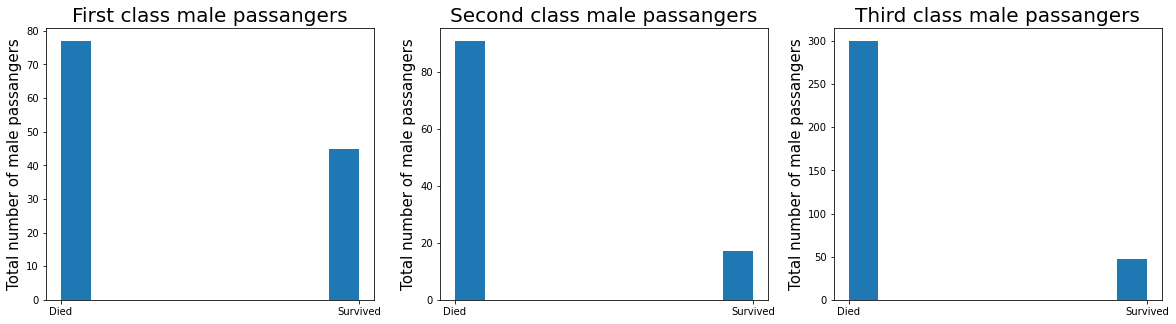

In [34]:
# Histogram of male passengers per class, most male passengers died in every class
fig, ax = plt.subplots(1,3, figsize=(20,5))

ax[0].hist(male_first.Survived)
ax[0].set_title("First class male passangers",fontsize = 20)
ax[0].set_ylabel("Total number of male passangers",fontsize = 15)
ax[0].set_xticklabels(xlabels)
ax[0].set_xticks(range(0,2,1))

ax[1].hist(male_second.Survived)
ax[1].set_title("Second class male passangers",fontsize = 20)
ax[1].set_ylabel("Total number of male passangers",fontsize = 15)
ax[1].set_xticklabels(xlabels)
ax[1].set_xticks(range(0,2,1))

ax[2].hist(male_third.Survived)
ax[2].set_title("Third class male passangers",fontsize = 20)
ax[2].set_ylabel("Total number of male passangers",fontsize = 15)
ax[2].set_xticklabels(xlabels)
ax[2].set_xticks(range(0,2,1))

plt.show()

In [35]:
#Create title feature from name
df_train['Title'] = df_train.Name.str.split(', ').str[1]
df_train['Title'] = df_train.Title.str.split('. ').str[0]

df_test['Title'] = df_test.Name.str.split(', ').str[1]
df_test['Title'] = df_test.Title.str.split('. ').str[0]

In [36]:
# Create bins to fit an fare range to every passenger
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200]
bin_labels_fare = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-149', '150+']

# Cut age into age groups so you can view it better
df_train['Farerange'] = pd.cut(df_train.Fare, bins, labels = bin_labels_fare,include_lowest = True)
df_test['Farerange'] = pd.cut(df_test.Fare, bins, labels = bin_labels_fare,include_lowest = True)

In [37]:
# Check the most common fare range among surving male passengers in first class
male_surv_first_class = df_train[(df_train.Sex == 'male') & (df_train.Pclass == 1) & (df_train.Survived == 1)]
print(male_surv_first_class.Farerange.mode())
# display(male_surv_first_class)

# Check the most common fare range among surving female passengers in first class
female_surv_first_class = df_train[(df_train.Sex == 'female') & (df_train.Pclass == 1) & (df_train.Survived == 1)]
print(female_surv_first_class.Farerange.mode())
# display(male_surv_first_class)

0    20-29
Name: Farerange, dtype: category
Categories (12, object): ['0-9' < '10-19' < '20-29' < '30-39' ... '80-89' < '90-99' < '100-149' < '150+']
0    70-79
Name: Farerange, dtype: category
Categories (12, object): ['0-9' < '10-19' < '20-29' < '30-39' ... '80-89' < '90-99' < '100-149' < '150+']


In [38]:
# Check the most common fare range among surving male passengers in second class
male_surv_second_class = df_train[(df_train.Sex == 'male') & (df_train.Pclass == 2) & (df_train.Survived == 1)]
print(male_surv_second_class.Farerange.mode())
# display(male_surv_second_class)

# Check the most common fare range among surving female passengers in second class
female_surv_second_class = df_train[(df_train.Sex == 'female') & (df_train.Pclass == 2) & (df_train.Survived == 1)]
print(female_surv_second_class.Farerange.mode())
# display(male_surv_second_class)

0    10-19
Name: Farerange, dtype: category
Categories (12, object): ['0-9' < '10-19' < '20-29' < '30-39' ... '80-89' < '90-99' < '100-149' < '150+']
0    10-19
Name: Farerange, dtype: category
Categories (12, object): ['0-9' < '10-19' < '20-29' < '30-39' ... '80-89' < '90-99' < '100-149' < '150+']


In [39]:
# Check the most common fare range among surving male passengers in third class
male_surv_third_class = df_train[(df_train.Sex == 'male') & (df_train.Pclass == 3) & (df_train.Survived == 1)]
print(male_surv_third_class.Farerange.mode())
# display(male_surv_third_class)

# Check the most common fare range among surving female passengers in third class
female_surv_third_class = df_train[(df_train.Sex == 'female') & (df_train.Pclass == 3) & (df_train.Survived == 1)]
print(female_surv_third_class.Farerange.mode())
# display(male_surv_third_class)

0    0-9
Name: Farerange, dtype: category
Categories (12, object): ['0-9' < '10-19' < '20-29' < '30-39' ... '80-89' < '90-99' < '100-149' < '150+']
0    0-9
Name: Farerange, dtype: category
Categories (12, object): ['0-9' < '10-19' < '20-29' < '30-39' ... '80-89' < '90-99' < '100-149' < '150+']


In [40]:
df_train['Comp'] = df_train['SibSp'] + df_train['Parch']
df_test['Comp'] = df_test['SibSp'] + df_test['Parch']

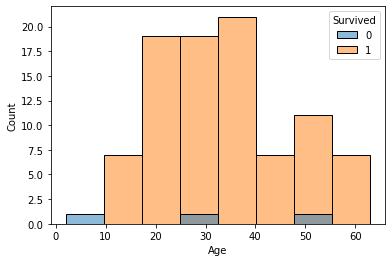

In [41]:
df_surv= df_train.loc[(df_train['Pclass'] == 1) & (df_train['Sex'] == 'female')]
df_not_surv = df_train.loc[(df_train['Pclass'] == 2) & (df_train['Sex'] == 'male')  & (df_train['Survived'] == 0)]

fig, ax = plt.subplots()

sns.histplot(data=df_surv, x='Age', hue='Survived')
plt.show()




Hier onder wordt de test data aangepast en in een csv file opgeslagen om het resultaat te kunnen inleveren op Kaggle

In [42]:
# Male in first class
df_test[(df_test['Sex'] == 'male') & (df_test['Pclass'] == 1) & (df_test['Comp'] == 3)]
df_test.loc[(df_test['Sex'] == 'male') & (df_test['Pclass'] == 1) & (df_test['Age'] > 79) , 'Survived'] = 1

# Male in second class
df_test.loc[(df_test['Sex'] == 'male') & (df_test['Pclass'] == 2) & (df_test['Age'] < 10), 'Survived'] = 1

# Male in third class
df_test.loc[(df_test['Sex'] == 'male') & (df_test['Pclass'] == 3) & (df_test['Fare'] > 50) & (df_test['Fare'] < 60), 'Survived'] = 1

# Female in first class
df_test.loc[(df_test['Sex'] == 'female') & (df_test['Pclass'] == 1), 'Survived'] = 1
df_test.loc[(df_test['Sex'] == 'female') & (df_test['Pclass'] == 1) & (df_test['Age'] < 9), 'Survived'] = 0

# Female in second class
df_test.loc[(df_test['Sex'] == 'female') & (df_test['Pclass'] == 2), 'Survived'] = 1

# Female in third class
df_test[(df_test['Sex'] == 'female') & (df_test['Pclass'] == 3) & (df_test['Comp'] == 3)]

# Everyone that payed more than 500 survives
df_test.loc[(df_test['Fare'] > 500), 'Survived'] = 1




In [43]:
# Create new dataframe that only contains de PassengerId and Survived columns
data = df_test[['PassengerId', 'Survived']]

# Display the new dataframe
display(data)

# Create a csv file of the dataframe called result
# data.to_csv('result.csv', index=False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
